In [ ]:
import numpy as np
# test area
np.maximum.accumulate([1,2,3,1,5])
np.power(2,3)

# Load Data

In [5]:
%matplotlib inline
import pandas
import numpy as np
from matplotlib import pyplot as plt

df = pandas.read_csv('d.csv', index_col=0)
names = df.index
columns = df.columns

a = df.iloc[:, :-1]
b = df.iloc[:, 1:]
b.columns = a.columns
r = (b - a) / a
r = r.values
base = 10
df = pandas.DataFrame(np.concatenate((np.ones([r.shape[0], 1]) * base,
                np.add.accumulate(r, axis=1) + np.ones(r.shape) * base), axis=1))
df.index = names
df.columns = columns

origin = df.copy()
for i in range(2, 11):
    n = origin.copy() * i
    n.index = map(lambda x: str(i) + x, origin.index)
    df = pandas.concat([df, n])

l = df.shape[0]
correlation = np.ones([l, l])




d = df.values
df.index[[7, 7+71]]

Index(['1.5倍做多波动率指数短期期货ETF-ProShares#UVXY', '21.5倍做多波动率指数短期期货ETF-ProShares#UVXY'], dtype='object')

In [17]:
latest = np.load('lasttime.npy')
print(latest.shape)
print(latest[0:3])
print(latest[-3:])

dict = {}
for a in latest:
    for b in a[0]:
        if b in dict:
            dict[b] += 1
        else:
            dict[b] = 1
x = []
for key in dict:
    x.append([key, dict[key]])
x = sorted(x, key=lambda m: m[1], reverse=True)

for y in x[:500]:
    print(df.index[y[0]], y[0], y[1])


for a in latest:
    if 6 in a[0]:
        print(list(df.index[a[0]]), a)
    
for a in latest[0:10]:
    print(list(df.index[a[0]]), a)

idx = latest[0][0]

(5000, 4)
[[list([32, 279, 412, 450, 466, 492]) 46.365140941727255
  0.0013380763948319197 0.0012276688500321132]
 [list([208, 208, 208, 395, 412, 450]) 46.300544293995806
  0.0012974139115985287 0.0011236280805185569]
 [list([308, 421, 450, 554, 679, 705]) 46.23225389553586
  0.0013160230654003077 0.0011737629027332274]]
[[list([84, 208, 237, 341, 492, 679]) 38.5730799860993
  0.0013283172922411966 0.0014452065558506338]
 [list([27, 68, 208, 450, 679, 705]) 38.572881737520675
  0.0013784745024898303 0.0016017367735892255]
 [list([67, 208, 350, 450, 634, 679]) 38.5728538615491
  0.0014544602861401067 0.0018387082270904056]]
10Netflix Inc.#NFLX 679 3254
10Square Inc#SQ 705 1883
7苹果#AAPL 450 1870
5苹果#AAPL 308 1836
6波音#BA 412 1833
9Square Inc#SQ 634 1534
3Square Inc#SQ 208 1517
7Square Inc#SQ 492 1480
5Square Inc#SQ 350 1172
8Square Inc#SQ 563 1093
6Square Inc#SQ 421 1029
4Square Inc#SQ 279 967
4波音#BA 270 526
3苹果#AAPL 166 436
6苹果#AAPL 379 396
6Netflix Inc.#NFLX 395 387
2波音#BA 128 379
7Net

In [ ]:
for a in latest:
    s = (d[a[0]]).sum(axis=0)
    drop = 1 - s / np.maximum.accumulate(s)
    drop_i = np.argsort(drop)
    def getIJ(ij, i):
        return ij[i], np.argmax(s[:ij[i]])

    i, j = getIJ(drop_i, -1)     
    if drop[i] < 0.01:
        print('max drawback {:0.2f}% {:0.2f} {:0.2f} {} {}'.format(drop[i] * 100, s[i], s[j], i, j))
        print('average drop', drop.mean())
        print(list(df.index[a[0]]), a)

# Test By tiger data

['短期VIX指数期货ETN#VXX', '3苹果#AAPL', '3苹果#AAPL', '5波音#BA', '7Netflix Inc.#NFLX', '10Square Inc#SQ']
contribution: [1.         1.16089006 1.16089006 1.8687891  4.4918655  7.54810113]
A,B 0.0012753315578588572 3.8743891097897016
revisit times:  28
loss:  0.0013269257773179538
0.1506033665655071
max drawback 0.96% 52.49 53.00 74 69
average drop 0.0011469600910990665
55.52600067168706
111.0


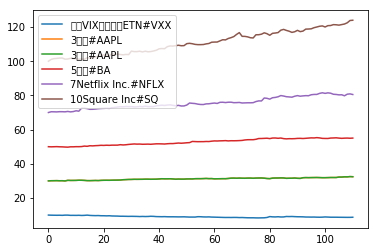

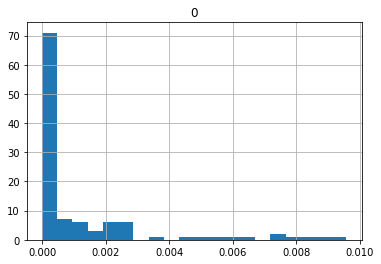

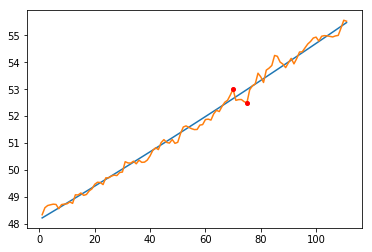

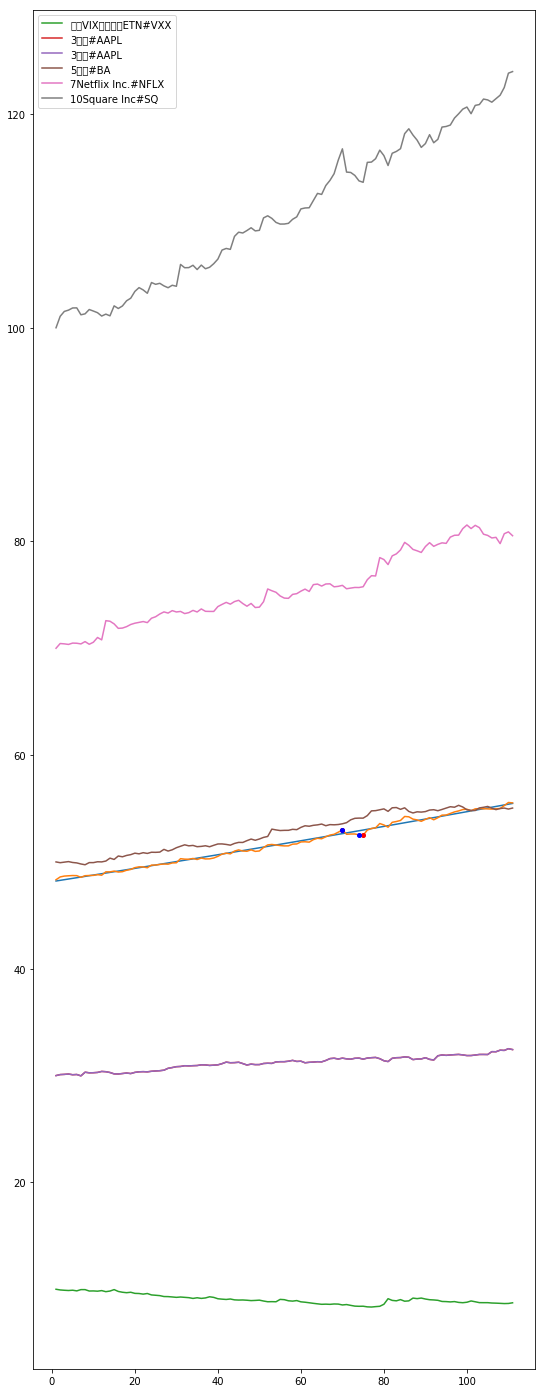

In [10]:
idx = [6, 166, 166, 341, 466, 705]
columns = list(np.array(df.index)[idx])
print(columns)

dates = df.columns.astype(np.float32)
startDate = dates[0]
dates = np.round((dates - startDate) / 3600 / 24 / 1000 / 7) + 1



# basic info
a = d[idx][:, 1:]
b = d[idx][:, :-1]
r = a - b
contri= np.abs(r).mean(axis=1)
contri = contri / contri.min()
print("contribution: {}".format(contri))

graph = pandas.DataFrame(d[idx]).T
graph.columns = columns 
graph.plot()

s = (d[idx]).sum(axis=0)
def evaluate(s, dates, components):
    # regression 
    s = s / len(idx)
    A, B = np.polyfit(dates, np.log(s), 1)
    print('A,B', A, B)
    y = np.exp(A * dates + B)
    last = s[0] < y[0]
    reg = 0
    for i in range(1, len(s)):
        if (s[i] < y[i]) != last:
            reg += 1
            last = s[i] < y[i]
    print('revisit times: ', reg)
    
    loss = (((y - s) / s) ** 2)
    print('loss: ', np.array(loss).sum())
    print(y[-1] / y[0] - 1)


    # max drawback 
    drop = 1 - s / np.maximum.accumulate(s)
    drop_i = np.argsort(drop)
    def getIJ(ij, i):
        return ij[i], np.argmax(s[:ij[i]])

    i, j = getIJ(drop_i, -1)     
    print('max drawback {:0.2f}% {:0.2f} {:0.2f} {} {}'.format(drop[i] * 100, s[i], s[j], i, j))
    print('average drop', drop.mean())
    pandas.DataFrame(drop).hist(bins=20)


    print(s[-1])
    print(dates[-1])

    plt.figure()
    plt.plot(dates, y)
    plt.plot(dates, s)
    plt.plot([i+1,j+1], [s[i], s[j]], 'o', color='Red', markersize=4)

    plt.figure(figsize=(9,25))
    plt.plot(dates, y)
    plt.plot(dates, s)
    if components is not None:
        plots = []
        for x in range(len(components.values.T)):
            plots.append(plt.plot(dates, components.values.T[x], label=components.columns[x])[0])
        plt.legend(handles=plots)
    plt.plot([i+1,j+1], [s[i], s[j]], 'o', color='Red', markersize=4)

    i2, j2 = getIJ(drop_i, -2)
    plt.plot([i2+1,j2+1], [s[i2], s[j2]], 'o', color='Blue', markersize=4)

evaluate(s, dates, graph)

In [ ]:
columns = list(np.array(df.index)[idx])
print(columns)
names = list(map(lambda c: c.split('#')[1], columns))

df2 = None
for n in names:
    f = '/Users/junnwang/Downloads/csv 2/' + n + '_week.csv'
    if df2 is None:
        df2 = pandas.read_csv(f, index_col=0).T
    else:
        df2 = pandas.concat([df2,pandas.read_csv(f, index_col=0).T], axis=1)
print(df2.dropna(axis=0,how='any').astype('float32').shape)     
df2 = df2.iloc[-160:,:]
d2 = df2.dropna(axis=1,how='any').astype('float32').T
a = d2.iloc[:, :-1]
b = d2.iloc[:, 1:]
print(a.shape)
print(b.shape)
b.columns = a.columns = range(d2.shape[1] - 1)
r = (b - a) / a
p2 = p[idx]
r = (r.T * p2).T.values


dates = d2.columns.astype(np.float32)
startDate = dates[0]
dates = np.round((dates - startDate) / 3600 / 24 / 1000 / 7) + 1

dd2 = np.concatenate((np.ones([r.shape[0], 1]) * base,
                        np.add.accumulate(r, axis=1) + np.ones(r.shape) * base), axis=1)

s = dd2.sum(axis=0)
print("percentage of total value: {}".format(p2 / p2.sum() * 100))

dd2 = pandas.DataFrame(dd2.T)
dd2.columns = columns
evaluate(s, dates, dd2)

# Test by yahoo data

In [ ]:
from glob import glob
df = None
for f in glob('sss\\*.csv'):
    name = f.split('\\')[1].split('.')[0]
    if df is None:
        df = pandas.read_csv(f, index_col=0)[['Adj Close']]
        df.columns = [name]
    else:
        csv = pandas.read_csv(f, index_col=0)[['Adj Close']]
        csv.columns = [name]
        df = pandas.concat([df,csv], axis=1)
        
df = df.dropna().T
print(df.shape)
a = df.iloc[:, :-1]
b = df.iloc[:, 1:]
b.columns = a.columns
r = (((b - a) / a).T * p[idx] ).T
r = np.concatenate((np.ones([r.shape[0], 1]) * base,
                    np.add.accumulate(r, axis=1) + np.ones(r.shape) * base), axis=1).T
r = pandas.DataFrame(r)
r.index = df.columns.astype(np.datetime64)
r.columns = df.index
r.plot(figsize=(16, 9))
print(r.shape)

y2 = r.sum(axis=1)
#plt.figure(figsize=(16, 9))
plt.plot(df.columns.astype(np.datetime64), y2 / len(idx))


# Test random output distribution

In [ ]:
import random
import dao

dist = []
n = 6
for i in range(500000):
    choice = random.sample(range(d.shape[0]), n)
#     bad = True
#     while bad:
#         bad = False
#         for k in range(len(choice)):
#             for l in range(k):
#                 if np.abs(correlation[choice[k]][choice[l]]) == 0:
#                     bad = True
#                     break
#             if bad:
#                 break
#         if bad:
#             choice = random.sample(range(d.shape[0]), n)

    result = dao.test_choice(choice)
    dist.append(result[1])
    
pandas.DataFrame(dist).hist(bins=1000)
pandas.qcut(dist,  [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.999, 1])

# Load Weekly data and clean into d.csv

In [ ]:
%matplotlib inline
import pandas
from glob import glob
import numpy as np

search = ['SPY','EEM','QQQ','HYG','IWM','XLF','VXX','UVXY','EFA','FXI','EWZ','TLT','GLD','FEZ','SMH','USO','SLV','GDX','XLI','XLE','DIA','XRT','XOP','KRE','AAPL','BAC','BABA','TSLA','FB','AMZN','GE','AMD','MU','C','INTC','AABA','EA','JPM','F','NXPI','NFLX','TWTR','MSFT','FOXA','SNAP','WYNN','GM','CAT','WFC','X','T','JD','PBR','QCOM','USB','AA','WMT','DBX','AAL','BA','CMCSA','BIDU','KMI','MS','MET','FCX','NVDA','M','SQ','GS','V','BK','DB']

df = None
# for f in glob('D:\\work\\main\\IB\\csv\\*_week.csv'):
#     if df is None:
#         df = pandas.read_csv(f, index_col=0).T
#     else:
#         df = pandas.concat([df,pandas.read_csv(f, index_col=0).T], axis=1)
for s in search:
    f = 'D:\\work\\main\\IB\\csv\\' + s + '_week.csv'
    if df is None:
        df = pandas.read_csv(f, index_col=0).T
    else:
        df = pandas.concat([df,pandas.read_csv(f, index_col=0).T], axis=1)



d = df.iloc[-112:-1,:]
d = d.dropna(axis=1,how='any').astype('float32').T
print(d.shape)
d.to_csv('d.csv')

# Load Daily data

In [ ]:
from glob import glob
%matplotlib inline
import pandas
import numpy as np
from matplotlib import pyplot as plt

daily = None
for f in glob('D:\\work\\main\\IB\\*_day.csv'):
    if daily is None:
        daily = pandas.read_csv(f, index_col=0).T
    else:
        daily = pandas.concat([daily,pandas.read_csv(f, index_col=0).T], axis=1)
daily.to_csv('day.csv')

# Test by day data

In [ ]:
from glob import glob
daily = pandas.read_csv('day.csv', index_col=0)[columns].T
print(columns)
moneyNeeded = 100 / (p[idx]/p[idx].sum()/daily.T.iloc[-1,:].values)[2]
tobuy = np.round(moneyNeeded * p[idx]/p[idx].sum() /  daily.T.iloc[-1,:].values)
moneyNeeded = tobuy * daily.T.iloc[-1,:].values
print('shares ', str(tobuy), tobuy.sum(), moneyNeeded)
moneyNeeded = moneyNeeded.sum()
print(moneyNeeded)

a = daily.iloc[:, :-1]
b = daily.iloc[:, 1:]
a.columns = b.columns
r = ((b / a - 1).T * p[idx] ).T
print(r.shape)

dates = daily.columns.astype(np.float32)
dates = np.round((dates - startDate) / 3600 / 24 / 1000) / 7 + 1
base = 10.4
r = np.concatenate((np.ones([r.shape[0], 1]) * base,
                    np.add.accumulate(r, axis=1) + np.ones(r.shape) * base), axis=1).T
r = pandas.DataFrame(r)
r.columns = columns
r.index = dates
r.plot(figsize=(16,9))

y = np.exp(A * dates + B) * moneyNeeded / 10
y2 = r.sum(axis=1) / len(columns) * moneyNeeded / 10
plt.figure(figsize=(16,9))
plt.plot(dates, y)
plt.plot(dates, y2)
#plt.plot(111, np.exp(A * 111 + B), marker='o', color='r', ls='')
#y2[-1] / y[-1] - 1